# Predicting Titanic Surviors
### Option 3 - Nolan Pestano

In this dataset, we will use a Neural Network to seek patterns in survival of the Titanic, and build a Neural Network to predict if one was able to survive.  


#### Note, this data set came pre split into testing and training data sets. We combine them in this data set to make it easier for data cleanup

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Lets read in our data and take a peek at it.

In [7]:
df = pd.read_csv("titanic.csv",index_col=0)


# move the survived column to the end, it makes sense to me for it to be at teh end
# https://stackoverflow.com/questions/25649429/how-to-swap-two-dataframe-columns
columns_titles = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked','Survived']
df=df.reindex(columns=columns_titles)

df.columns = map(str.lower, df.columns)

df.head(10)


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1


This data set provides us with some ~900 passangers aboard the Titanic when it sunk, alongside some corresponding information from them.

From Kaggle:
<details> <summary>All data points and their meaning</summary>
```
    PassengerId is the unique id of the row and it doesn't have any effect on target

    Survived is the target variable we are trying to predict (0 or 1):

        1 = Survived
        0 = Not Survived

    Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):

        1 = Upper Class
        2 = Middle Class
        3 = Lower Class

    Name, Sex and Age are self-explanatory

    SibSp is the total number of the passengers' siblings and spouse

    Parch is the total number of the passengers' parents and children

    Ticket is the ticket number of the passenger

    Fare is the passenger fare

    Cabin is the cabin number of the passenger

    Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
        C = Cherbourg
        Q = Queenstown
        S = Southampton
```
</details>

##### There is a lot of missing info pertaining to certain passangers. We will not only have to acknowledge that, but find a solution.

In [8]:
for col in df.columns:
    print(col,df[col].isnull().sum())

pclass 0
name 0
sex 0
age 177
sibsp 0
parch 0
ticket 0
fare 0
cabin 687
embarked 2
survived 0


So we don't know if 177 passangers's ages, we don't know where 687 roomed at, and we don't know where two embarked.

Let's tackle the age first

In [9]:
df[df["age"].isnull()]


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
PassengerId,,,,,,,,,,,
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...
860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0
869,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0


it would be foolish to just fill in with the median age, as there is a lot of factors that affect age. that is there is a logical conclusion that those paying higher fares would likely be higher class and thus higher age

In [10]:
# get median age from each class
for i in range(1,4): #1, 2 ,3 is there an easier way to do this loooool
    print(f"Median age for class {i} is {df[df["pclass"]==i]["age"].median()}")
    
# if the passanger is missing age, fill it with the median age of their class
def apply_age(row):
    if (pd.isnull(row["age"])):
        age = df[df["pclass"]==row["pclass"]]["age"].median()
        return age
    else:
        return row["age"]

df["age"] = df.apply(apply_age,axis=1)
print(df["age"].isnull().sum())
(df["age"].head(10))

SyntaxError: f-string: unmatched '[' (2374412479.py, line 3)

There's probably a more accurate way to deal with those, but I feel like that is a fair compromise. 

Let's do the other relatively easy one, the embarked

In [ ]:
df[df["embarked"].isnull()]

A quick google search tells us that the two fo them were firends, and embarked at Southampton. Let's jsut add that manually.
https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

In [ ]:
def change_embark(row):
    if pd.isnull(row['embarked']):
        return "S"
    else:
        return row['embarked']
    
df["embarked"] = df.apply(change_embark,axis=1)
df["embarked"].isnull().sum()

Now the only row with reamining empty data is the cabin column

This is a rather difficult piece of data to assign, and honestly, I'm not sure how to tackle it.
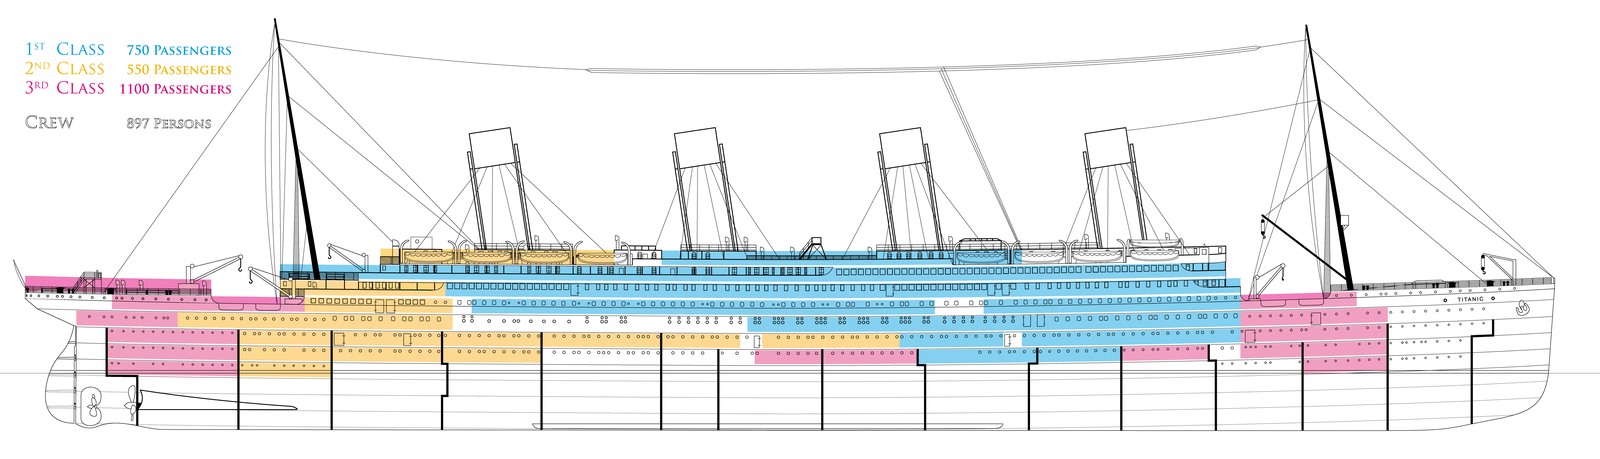 

I can imagine that the lower classes have a lower cabin? But truly, there's a lot of missing data, so even if I had an epiphany, I feel like the 600 missing data points wouldn't allowe me to make a good decision.

Let's just drop all the irrelevant rows. 

In [11]:
# drop uneeded columns
print(df.columns)
df = df.drop(columns=["name", "ticket", "cabin"])
df.head()

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')


,pclass,sex,age,sibsp,parch,fare,embarked,survived
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,0
2,1,female,38.0,1,0,71.2833,C,1
3,3,female,26.0,0,0,7.9250,S,1
4,1,female,35.0,1,0,53.1000,S,1
5,3,male,35.0,0,0,8.0500,S,0
